#Student Name: Justin Helfman
#ECE 595 Machine Learning II
#Project 2: Autoencoders - Student Code

In [ ]:
#Import necessary packages
import numpy as np
from keras.datasets import mnist
from keras.layers import Dense, Conv2D, MaxPooling2D, UpSampling2D
from keras.models import Sequential
import matplotlib.pyplot as plt
from keras import backend as K
import tensorflow as tf
import keras

#Part 0: Importing and Normalizing Data

In [ ]:
#Load MNIST data and normalize to [0,1]
(data_train, _), (data_test, _) = mnist.load_data()
data_train = data_train/255.0
data_test = data_test/255.0

#Part 1: Deep Fully-Connected AutoEncoder

Answer the following questions: 


1.  We want to predict output values of the intensity of the pixels which are between 0 to 1. Therefore choice of output layer activation function is important. (Open ended reasoning question). (a) Choose 'softmax’ or ‘sigmoid’. Reason why one is preferred over the other.

  ANS: For this problem, where the intensity of the pixels is between 0 and 1, we want to use a sigmoidal activation function.  One of the main reasons for sigmoid is that it is intended more for bernoulli distributions, wheras the softmax is intended for multinoulli distributions.  Though we are intending to predict what number is being shown (out of multiple options) we are only using this activation funtion for the pixel intensity, so there are only two classes.

In [ ]:
#Reshape training and testing data into 784-dimensional vectors
#FILL IN THIS CODE BLOCK
data_train = data_train.reshape(60000, 784)
data_test = data_test.reshape(10000, 784)

In [ ]:
#Create autoencoder architecture
def deep_ae():
    model = Sequential()

    #FILL THIS IN WITH MODEL ARCHITECTURE

    #784 perceptron input layer
    model.add(Dense(400, activation="relu", kernel_initializer="uniform", input_dim=784))#400 perceptrons
    model.add(Dense(200, activation="relu", kernel_initializer="uniform"))#200 perceptrons
    model.add(Dense(100, activation="relu", kernel_initializer="uniform"))#100 perceptrons
    model.add(Dense(200, activation="relu", kernel_initializer="uniform"))#200 perceptrons
    model.add(Dense(400, activation="relu", kernel_initializer="uniform"))#400 perceptrons
    model.add(Dense(784, activation="sigmoid", kernel_initializer="uniform"))#output 784 perceptrons

    return model

#Create deep autoencoder graph
deep_ae = deep_ae()

#Compile model using an appropriate loss and optimizer algorithm
#FILL THIS IN
deep_ae.compile(loss="binary_crossentropy", optimizer="sgd")

#Train the model and assign training meta-data to a variable
#FILL THIS IN
num_epochs = 150
batch_size = 1024
deep_ae_history_BCE = deep_ae.fit(data_train, data_train, validation_data=(data_test, data_test), epochs=num_epochs, batch_size=batch_size, shuffle=True)

#Calculate the reconstructions of the testing set (output of autoencoder on test set)
#FILL THIS IN
reconstructions = deep_ae.predict(data_test)

#Obtain encoder representation of data
get_hl = K.function([deep_ae.layers[0].input], [deep_ae.layers[2].output]) #The third hidden layer is indexed at 2
deep_ae_hl = get_hl([data_test])[0]

Epoch 1/150
59/59 [==============================] - 1s 9ms/step - loss: 0.6931 - val_loss: 0.6930
Epoch 2/150
59/59 [==============================] - 0s 7ms/step - loss: 0.6929 - val_loss: 0.6929
Epoch 3/150
59/59 [==============================] - 0s 7ms/step - loss: 0.6928 - val_loss: 0.6927
Epoch 4/150
59/59 [==============================] - 0s 7ms/step - loss: 0.6927 - val_loss: 0.6926
Epoch 5/150
59/59 [==============================] - 0s 7ms/step - loss: 0.6925 - val_loss: 0.6925
Epoch 6/150
59/59 [==============================] - 0s 7ms/step - loss: 0.6924 - val_loss: 0.6923
Epoch 7/150
59/59 [==============================] - 0s 7ms/step - loss: 0.6922 - val_loss: 0.6922
Epoch 8/150
59/59 [==============================] - 0s 7ms/step - loss: 0.6921 - val_loss: 0.6920
Epoch 9/150
59/59 [==============================] - 0s 7ms/step - loss: 0.6920 - val_loss: 0.6919
Epoch 10/150
59/59 [==============================] - 0s 7ms/step - loss: 0.6918 - val_loss: 0.6918
Epoch 11/

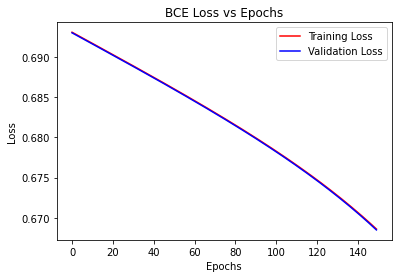

In [ ]:
#Plot loss vs epoch for BCE and MSE [Together or separate, Both accepted]
#FILL THIS CODE BLOCK IN AND PRODUCE PLOT
a = plt.plot(deep_ae_history_BCE.history['loss'], color="red", label="Training Loss")
b = plt.plot(deep_ae_history_BCE.history['val_loss'], color="blue", label="Validation Loss")

plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("BCE Loss vs Epochs")

plt.legend(loc="best")

plt.show()

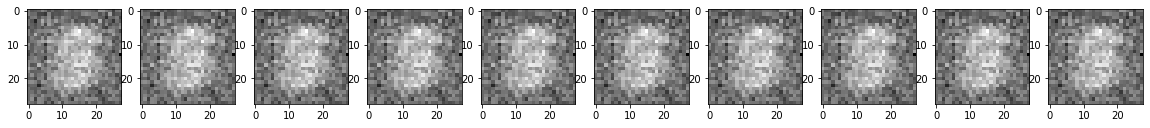

In [ ]:
#Show samples of 10 images, their hidden layer representations, and their reconstructions
#FILL THIS CODE BLOCK IN AND PRODUCE SAMPLES
plt.figure(figsize=(20, 4))

for i in range(10):
  ax = plt.subplot(1,10, i + 1)
  plt.imshow(reconstructions[i].reshape(28, 28))
  plt.gray()

plt.show()

In [ ]:
#Create autoencoder architecture
def deep_ae():
    model = Sequential()

    #FILL THIS IN WITH MODEL ARCHITECTURE

    #784 perceptron input layer
    model.add(Dense(400, activation="relu", kernel_initializer="uniform", input_dim=784))#400 perceptrons
    model.add(Dense(200, activation="relu", kernel_initializer="uniform"))#200 perceptrons
    model.add(Dense(100, activation="relu", kernel_initializer="uniform"))#100 perceptrons
    model.add(Dense(200, activation="relu", kernel_initializer="uniform"))#200 perceptrons
    model.add(Dense(400, activation="relu", kernel_initializer="uniform"))#400 perceptrons
    model.add(Dense(784, activation="sigmoid", kernel_initializer="uniform"))#output 784 perceptrons

    return model

#Create deep autoencoder graph
deep_ae = deep_ae()

#Compile model using an appropriate loss and optimizer algorithm
#FILL THIS IN
deep_ae.compile(loss="mse", optimizer="sgd")

#Train the model and assign training meta-data to a variable
#FILL THIS IN
num_epochs = 150
batch_size = 1024
deep_ae_history_MSE = deep_ae.fit(data_train, data_train, validation_data=(data_test, data_test), epochs=num_epochs, batch_size=batch_size, shuffle=True)

#Calculate the reconstructions of the testing set (output of autoencoder on test set)
#FILL THIS IN
reconstructions = deep_ae.predict(data_test)

#Obtain encoder representation of data
get_hl = K.function([deep_ae.layers[0].input], [deep_ae.layers[2].output]) #The third hidden layer is indexed at 2
deep_ae_hl = get_hl([data_test])[0]

Epoch 1/150
59/59 [==============================] - 0s 8ms/step - loss: 0.2313 - val_loss: 0.2314
Epoch 2/150
59/59 [==============================] - 0s 6ms/step - loss: 0.2313 - val_loss: 0.2314
Epoch 3/150
59/59 [==============================] - 0s 6ms/step - loss: 0.2313 - val_loss: 0.2313
Epoch 4/150
59/59 [==============================] - 0s 6ms/step - loss: 0.2312 - val_loss: 0.2313
Epoch 5/150
59/59 [==============================] - 0s 6ms/step - loss: 0.2312 - val_loss: 0.2313
Epoch 6/150
59/59 [==============================] - 0s 6ms/step - loss: 0.2311 - val_loss: 0.2312
Epoch 7/150
59/59 [==============================] - 0s 6ms/step - loss: 0.2311 - val_loss: 0.2312
Epoch 8/150
59/59 [==============================] - 0s 6ms/step - loss: 0.2311 - val_loss: 0.2312
Epoch 9/150
59/59 [==============================] - 0s 6ms/step - loss: 0.2310 - val_loss: 0.2311
Epoch 10/150
59/59 [==============================] - 0s 6ms/step - loss: 0.2310 - val_loss: 0.2311
Epoch 11/

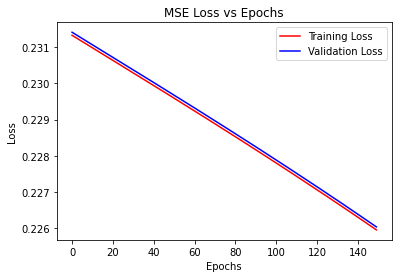

In [ ]:
#Plot loss vs epoch for BCE and MSE [Together or separate, Both accepted]
#FILL THIS CODE BLOCK IN AND PRODUCE PLOT
a = plt.plot(deep_ae_history_MSE.history['loss'], color="red", label="Training Loss")
b = plt.plot(deep_ae_history_MSE.history['val_loss'], color="blue", label="Validation Loss")

plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("MSE Loss vs Epochs")

plt.legend(loc="best")

plt.show()

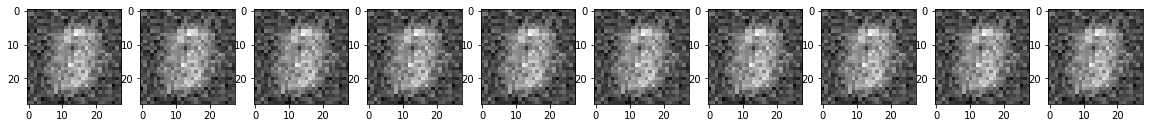

In [ ]:
#Show samples of 10 images, their hidden layer representations, and their reconstructions
#FILL THIS CODE BLOCK IN AND PRODUCE SAMPLES
plt.figure(figsize=(20, 4))

for i in range(10):
  ax = plt.subplot(1,10, i + 1)
  plt.imshow(reconstructions[i].reshape(28, 28))
  plt.gray()

plt.show()

Answer the following questions: 


1.  Question 2c: BONUS [reasoning question]: Pair the output layer activation and loss function which performs better together. Linear, sigmoid, Binary cross entropy and Mean Square error

ANS:  As we referenced in question 1, the best activation function for this network would be a sigmoid, as we expect pixel values to be between 0 and 1 and we are predicting one class of outputs.  as for the loss function, we would have to chose the BCE loss function as it tends to show lower costs than the MSE function, and appears to be fairly linear.

2.  Question 5: Which loss function is better and why?

ANS: As we can see in the plots above, the BSE loss function performs better and is more linear.  The main reasoning for this is that the BSE function is able to predict error values related to pixel brightness.  Because of this, the BCE function can calculate a more 'adaptive' loss to improve it's weights.

3.  Question 6: If we were to predict pixels values [0 to 255] directly at the output of last layer. Should there be an activation function in last later?  If yes, which activation function and why?,  If No, reason why?

ANS:  We should use an activation function for this scenario.  In this, we should use a ReLU function.  One of the main benefits of this ReLU function is that we can remove negative pixel values, as they wouldn't be possible in this scenario.

#Part 2: Deep Convolutional AutoEncoder

In [ ]:
#Reshape data into 2-D signals and account for grayscale channel in each image
#FILL IN THIS CODE BLOCK
data_train = data_train.reshape((-1, 28, 28, 1))
data_test = data_test.reshape((-1, 28, 28, 1))

In [ ]:
#Create Convolutional AutoEncoder Architecture
def cae():
    model = Sequential()

    #FILL THIS IN WITH MODEL ARCHITECTURE
    model.add(Conv2D(16, (3, 3), activation="relu", padding="same", input_shape=(28, 28, 1)))
    model.add(MaxPooling2D(pool_size=(2, 2), padding="same"))
    model.add(Conv2D(8, (3, 3), activation="relu", padding="same"))
    model.add(MaxPooling2D(pool_size=(2, 2), padding="same"))
    model.add(Conv2D(8, (3, 3), activation="relu", padding="same"))
    model.add(UpSampling2D((2,2))) #2x2 upsampling
    model.add(Conv2D(16, (3, 3), activation="relu", padding="same"))
    model.add(UpSampling2D((2,2))) #2x2 upsampling
    model.add(Conv2D(1, (3, 3), activation="sigmoid", padding="same"))
    

    return model

#Create deep autoencoder graph
conv_ae = cae()

#Compile model using an appropriate loss and optimizer algorithm
#FILL THIS IN
conv_ae.compile(loss="mse", optimizer="sgd")

#Train the model and assign training meta-data to a variable
#FILL THIS IN
num_epochs = 150
batch_size = 1024
conv_ae_history_MSE = conv_ae.fit(data_train, data_train, validation_data=(data_test, data_test), epochs=num_epochs, batch_size=batch_size, shuffle=True)

#Calculate the reconstructions of the testing set (output of autoencoder on test set)
#FILL THIS IN
reconstructions = conv_ae.predict(data_test)

#Obtain encoder representation of data
get_hl = K.function([conv_ae.layers[0].input], [conv_ae.layers[3].output])  # The fourth hidden layer are indexed at 3
conv_ae_hl = get_hl([data_test])[0]

Epoch 1/150
59/59 [==============================] - 1s 17ms/step - loss: 0.2217 - val_loss: 0.2031
Epoch 2/150
59/59 [==============================] - 1s 14ms/step - loss: 0.1881 - val_loss: 0.1736
Epoch 3/150
59/59 [==============================] - 1s 15ms/step - loss: 0.1598 - val_loss: 0.1476
Epoch 4/150
59/59 [==============================] - 1s 14ms/step - loss: 0.1373 - val_loss: 0.1300
Epoch 5/150
59/59 [==============================] - 1s 14ms/step - loss: 0.1238 - val_loss: 0.1206
Epoch 6/150
59/59 [==============================] - 1s 14ms/step - loss: 0.1165 - val_loss: 0.1153
Epoch 7/150
59/59 [==============================] - 1s 14ms/step - loss: 0.1121 - val_loss: 0.1117
Epoch 8/150
59/59 [==============================] - 1s 14ms/step - loss: 0.1089 - val_loss: 0.1089
Epoch 9/150
59/59 [==============================] - 1s 14ms/step - loss: 0.1062 - val_loss: 0.1064
Epoch 10/150
59/59 [==============================] - 1s 15ms/step - loss: 0.1039 - val_loss: 0.1041

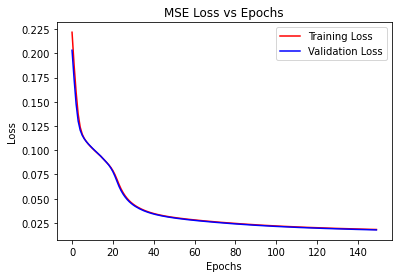

In [ ]:
#Plot loss vs epoch  for BCE and MSE [Together or separate, Both accepted]
#FILL THIS CODE BLOCK IN AND PRODUCE PLOT
a = plt.plot(conv_ae_history_MSE.history['loss'], color="red", label="Training Loss")
b = plt.plot(conv_ae_history_MSE.history['val_loss'], color="blue", label="Validation Loss")

plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("MSE Loss vs Epochs")

plt.legend(loc="best")

plt.show()

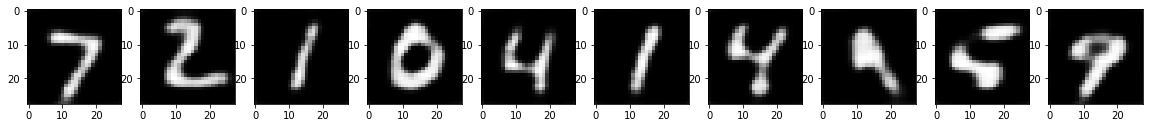

In [ ]:
#Show samples of 10 images, their hidden layer representations, and their reconstructions
#FILL THIS CODE BLOCK IN AND PRODUCE SAMPLES
plt.figure(figsize=(20, 4))

for i in range(10):
  ax = plt.subplot(1,10, i + 1)
  plt.imshow(reconstructions[i].reshape(28, 28))
  plt.gray()

plt.show()

In [ ]:
#Create Convolutional AutoEncoder Architecture
def cae():
    model = Sequential()

    #FILL THIS IN WITH MODEL ARCHITECTURE
    model.add(Conv2D(16, (3, 3), activation="relu", padding="same", input_shape=(28, 28, 1)))
    model.add(MaxPooling2D(pool_size=(2, 2), padding="same"))
    model.add(Conv2D(8, (3, 3), activation="relu", padding="same"))
    model.add(MaxPooling2D(pool_size=(2, 2), padding="same"))
    model.add(Conv2D(8, (3, 3), activation="relu", padding="same"))
    model.add(UpSampling2D((2,2))) #2x2 upsampling
    model.add(Conv2D(16, (3, 3), activation="relu", padding="same"))
    model.add(UpSampling2D((2,2))) #2x2 upsampling
    model.add(Conv2D(1, (3, 3), activation="sigmoid", padding="same"))

    return model

#Create deep autoencoder graph
conv_ae = cae()

#Compile model using an appropriate loss and optimizer algorithm
#FILL THIS IN
conv_ae.compile(loss="binary_crossentropy", optimizer="sgd")

#Train the model and assign training meta-data to a variable
#FILL THIS IN
num_epochs = 150
batch_size = 1024
conv_ae_history_BCE = conv_ae.fit(data_train, data_train, validation_data=(data_test, data_test), epochs=num_epochs, batch_size=batch_size, shuffle=True)

#Calculate the reconstructions of the testing set (output of autoencoder on test set)
#FILL THIS IN
reconstructions = conv_ae.predict(data_test)

#Obtain encoder representation of data
get_hl = K.function([conv_ae.layers[0].input], [conv_ae.layers[3].output])  # The fourth hidden layer are indexed at 3
conv_ae_hl = get_hl([data_test])[0]

Epoch 1/150
59/59 [==============================] - 1s 17ms/step - loss: 0.6387 - val_loss: 0.5798
Epoch 2/150
59/59 [==============================] - 1s 15ms/step - loss: 0.5271 - val_loss: 0.4782
Epoch 3/150
59/59 [==============================] - 1s 15ms/step - loss: 0.4461 - val_loss: 0.4257
Epoch 4/150
59/59 [==============================] - 1s 14ms/step - loss: 0.4104 - val_loss: 0.4000
Epoch 5/150
59/59 [==============================] - 1s 15ms/step - loss: 0.3851 - val_loss: 0.3758
Epoch 6/150
59/59 [==============================] - 1s 14ms/step - loss: 0.3640 - val_loss: 0.3573
Epoch 7/150
59/59 [==============================] - 1s 15ms/step - loss: 0.3464 - val_loss: 0.3402
Epoch 8/150
59/59 [==============================] - 1s 15ms/step - loss: 0.3284 - val_loss: 0.3198
Epoch 9/150
59/59 [==============================] - 1s 15ms/step - loss: 0.3024 - val_loss: 0.2845
Epoch 10/150
59/59 [==============================] - 1s 15ms/step - loss: 0.2585 - val_loss: 0.2350

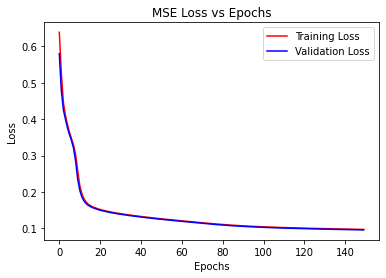

In [ ]:
#Plot loss vs epoch  for BCE and MSE [Together or separate, Both accepted]
#FILL THIS CODE BLOCK IN AND PRODUCE PLOT
a = plt.plot(conv_ae_history_BCE.history['loss'], color="red", label="Training Loss")
b = plt.plot(conv_ae_history_BCE.history['val_loss'], color="blue", label="Validation Loss")

plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("MSE Loss vs Epochs")

plt.legend(loc="best")

plt.show()

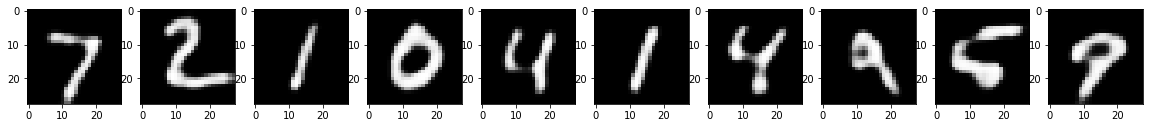

In [ ]:
#Show samples of 10 images, their hidden layer representations, and their reconstructions
#FILL THIS CODE BLOCK IN AND PRODUCE SAMPLES
plt.figure(figsize=(20, 4))

for i in range(10):
  ax = plt.subplot(1,10, i + 1)
  plt.imshow(reconstructions[i].reshape(28, 28))
  plt.gray()

plt.show()

Answer the following questions: 


1.  Question 4: Which loss function is better and why?

ANS: As we can see from the reconstructed figures, the MSE loss is much better than the BCE loss.  One of the main distinctions (graphically) is that the MSE loss approaches a value of 0025, wheras BCE approaches a much larger value of around 0.1.

#Part 3: Denoising AutoEncoder

In [ ]:
#Inject noise into testing data
noise_factor = 0.25
data_train_noisy = data_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=data_train.shape)
data_test_noisy = data_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=data_test.shape)

#Clip to stay within valid (normalized) pixel range
data_train_noisy = np.clip(data_train_noisy, 0., 1.)
data_test_noisy = np.clip(data_test_noisy, 0., 1.)

#Reshape data to comply with input of denoising autoencoder
#FILL THIS IN
data_train_noisy = data_train_noisy.reshape((-1, 28, 28, 1))
data_test_noisy = data_test_noisy.reshape((-1, 28, 28, 1))

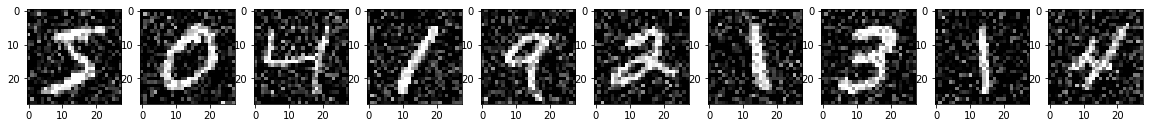

In [ ]:
#Show samples of 10 original images and their corrsponding noisy counterparts from the training set
#FILL THIS CODE BLOCK IN AND PRODUCE SAMPLES
plt.figure(figsize=(20, 4))

for i in range(10):
  ax = plt.subplot(1,10, i + 1)
  plt.imshow(data_train_noisy[i].reshape(28, 28))
  plt.gray()

plt.show()

In [ ]:
#Create denoising autoencoder architecture
def dae():

    model = Sequential()

    #FILL THIS IN WITH MODEL ARCHITECTURE
    model.add(Conv2D(16, (3, 3), activation="relu", padding="same", input_shape=(28, 28, 1)))
    model.add(MaxPooling2D(pool_size=(2, 2), padding="same"))
    model.add(Conv2D(8, (3, 3), activation="relu", padding="same"))
    model.add(MaxPooling2D(pool_size=(2, 2), padding="same"))
    model.add(Conv2D(8, (3, 3), activation="relu", padding="same"))
    model.add(UpSampling2D((2,2))) #2x2 upsampling
    model.add(Conv2D(16, (3, 3), activation="relu", padding="same"))
    model.add(UpSampling2D((2,2))) #2x2 upsampling
    model.add(Conv2D(1, (3, 3), activation="sigmoid", padding="same"))
    return model
  

  
#Compile and train the DAE
#FILL THIS IN
denoise_ae = dae()

denoise_ae.compile(loss="mse", optimizer="sgd")

num_epochs = 150
batch_size = 1024
denoise_ae_history = denoise_ae.fit(data_train_noisy, data_train, validation_data=(data_test_noisy, data_test), epochs=num_epochs, batch_size=batch_size, shuffle=True)

#Generate denoised versions of noisy inputs
#FILL THIS IN

reconstructions = denoise_ae.predict(data_test_noisy)

get_hl = K.function([denoise_ae.layers[0].input], [denoise_ae.layers[3].output])
denoise_ae_hl = get_hl([data_test_noisy])[0]

Epoch 1/150
59/59 [==============================] - 1s 16ms/step - loss: 0.2178 - val_loss: 0.2051
Epoch 2/150
59/59 [==============================] - 1s 15ms/step - loss: 0.1916 - val_loss: 0.1783
Epoch 3/150
59/59 [==============================] - 1s 14ms/step - loss: 0.1661 - val_loss: 0.1549
Epoch 4/150
59/59 [==============================] - 1s 14ms/step - loss: 0.1445 - val_loss: 0.1357
Epoch 5/150
59/59 [==============================] - 1s 14ms/step - loss: 0.1275 - val_loss: 0.1216
Epoch 6/150
59/59 [==============================] - 1s 14ms/step - loss: 0.1159 - val_loss: 0.1127
Epoch 7/150
59/59 [==============================] - 1s 14ms/step - loss: 0.1089 - val_loss: 0.1076
Epoch 8/150
59/59 [==============================] - 1s 14ms/step - loss: 0.1049 - val_loss: 0.1047
Epoch 9/150
59/59 [==============================] - 1s 14ms/step - loss: 0.1025 - val_loss: 0.1028
Epoch 10/150
59/59 [==============================] - 1s 14ms/step - loss: 0.1008 - val_loss: 0.1013

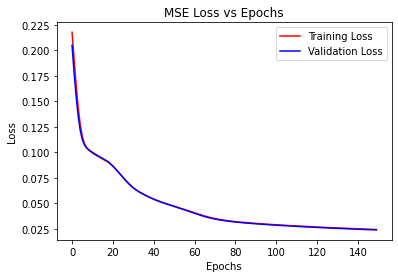

In [ ]:
#Plot loss vs epoch
#FILL THIS CODE BLOCK IN AND PRODUCE PLOT
a = plt.plot(denoise_ae_history.history['loss'], color="red", label="Training Loss")
b = plt.plot(denoise_ae_history.history['val_loss'], color="blue", label="Validation Loss")

plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("MSE Loss vs Epochs")

plt.legend(loc="best")

plt.show()

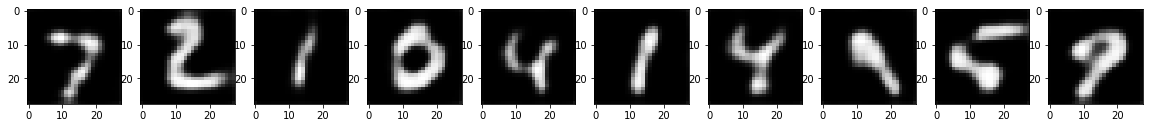

In [ ]:
#Show samples of 10 original images, their noisy counterparts, and their de-noised images from the testing set
#FILL THIS CODE BLOCK IN AND PRODUCE SAMPLES
plt.figure(figsize=(20, 4))

for i in range(10):
  ax = plt.subplot(1,10, i + 1)
  plt.imshow(reconstructions[i].reshape(28, 28))
  plt.gray()

plt.show()